In [1]:
# Data Manupulation
import numpy as np
import pandas as pd

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Read the data from Yahoo of SP 500
df= pdr.get_data_yahoo('SPY', '2020-01-01', '2021-03-14')

df = df.dropna()
df = df[['Open', 'High', 'Low','Close']]
print(df.head(5))
print("\n")
df.tail(5)

                  Open        High         Low       Close
Date                                                      
2019-12-31  320.529999  322.130005  320.149994  321.859985
2020-01-02  323.540009  324.890015  322.529999  324.869995
2020-01-03  321.160004  323.640015  321.100006  322.410004
2020-01-06  320.489990  323.730011  320.359985  323.640015
2020-01-07  323.019989  323.540009  322.239990  322.730011




,Open,High,Low,Close
Date,,,,
2021-03-08,384.660004,387.679993,381.420013,381.720001
2021-03-09,385.850006,389.910004,385.309998,387.170013
2021-03-10,389.690002,391.399994,388.170013,389.579987
2021-03-11,392.230011,395.649994,391.739990,393.529999
2021-03-12,392.070007,394.209991,391.200012,394.059998


In [4]:
# Predictor variables
df['Open-Close']= df.Open - df.Close
df['High-Low']  = df.High - df.Low
df =df.dropna()
X= df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2019-12-31,-1.329987,1.980011
2020-01-02,-1.329987,2.360016
2020-01-03,-1.250000,2.540009
2020-01-06,-3.150024,3.370026
2020-01-07,0.289978,1.300018


In [5]:
# Target variable
Y= np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [6]:
# Splitting the dataset
split_percentage = 0.85
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [7]:
# Instantiate KNN learning model(k=15)
knn = KNeighborsClassifier(n_neighbors=15)
# fit the model
knn.fit(X_train, Y_train)
# Accuracy Score
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))
print ('Train_data Accuracy KNN: %.2f' %accuracy_train)
print ('Test_data Accuracy KNN: %.2f' %accuracy_test)

# SGD
sgd = linear_model.SGDClassifier(max_iter=1000, tol=None)
sgd.fit(X_train, Y_train)
accuracy_train = accuracy_score(Y_train, sgd.predict(X_train))
accuracy_test = accuracy_score(Y_test, sgd.predict(X_test))
print("\n")
print ('Train_data Accuracy SGD: %.2f' %accuracy_train)
print ('Test_data Accuracy SGD: %.2f' %accuracy_test)

# Random Forest
random_forest = RandomForestClassifier(n_estimators= 1, max_features= 2, max_depth=3, min_samples_leaf=3)
random_forest.fit(X_train, Y_train)
print("\n")
accuracy_train = accuracy_score(Y_train, random_forest.predict(X_train))
accuracy_test = accuracy_score(Y_test, random_forest.predict(X_test))
print ('Train_data Accuracy Random Forest: %.2f' %accuracy_train)
print ('Test_data Accuracy Random Forest: %.2f' %accuracy_test)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print("\n")
accuracy_train = accuracy_score(Y_train, logreg.predict(X_train))
accuracy_test = accuracy_score(Y_test, logreg.predict(X_test))
print ('Train_data Accuracy Logistic Regression: %.2f' %accuracy_train)
print ('Test_data Accuracy Logistic Regression: %.2f' %accuracy_test)

# Gaussian Naives
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
print("\n")
accuracy_train = accuracy_score(Y_train, gaussian.predict(X_train))
accuracy_test = accuracy_score(Y_test, gaussian.predict(X_test))
print ('Train_data Accuracy Gaussian Naives: %.2f' %accuracy_train)
print ('Test_data Accuracy Gaussian Naives: %.2f' %accuracy_test)

# Linear Support Vector Machine
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
print("\n")
accuracy_train = accuracy_score(Y_train, linear_svc.predict(X_train))
accuracy_test = accuracy_score(Y_test, linear_svc.predict(X_test))
print ('Train_data Accuracy Linear Support Vector Machine: %.2f' %accuracy_train)
print ('Test_data Accuracy Linear Support Vector Machine: %.2f' %accuracy_test)

# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)
decision_tree.fit(X_train, Y_train)
print("\n")
accuracy_train = accuracy_score(Y_train, decision_tree.predict(X_train))
accuracy_test = accuracy_score(Y_test, decision_tree.predict(X_test))
print ('Train_data Accuracy Decision Tree: %.2f' %accuracy_train)
print ('Test_data Accuracy Decision Tree: %.2f' %accuracy_test)

Train_data Accuracy KNN: 0.63
Test_data Accuracy KNN: 0.67


Train_data Accuracy SGD: 0.51
Test_data Accuracy SGD: 0.48


Train_data Accuracy Random Forest: 0.59
Test_data Accuracy Random Forest: 0.57


Train_data Accuracy Logistic Regression: 0.58
Test_data Accuracy Logistic Regression: 0.59


Train_data Accuracy Gaussian Naives: 0.58
Test_data Accuracy Gaussian Naives: 0.63


Train_data Accuracy Linear Support Vector Machine: 0.57
Test_data Accuracy Linear Support Vector Machine: 0.59


Train_data Accuracy Decision Tree: 0.62
Test_data Accuracy Decision Tree: 0.54
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [8]:
# Predicted Signal
df['Predicted_Signal'] = knn.predict(X)

In [9]:
# SPY Cumulative Returns
df['SPY_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_SPY_returns = df[split:]['SPY_returns'].cumsum()*100

In [10]:
# Cumulative Strategy Returns 
df['Startegy_returns'] = df['SPY_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = df[split:]['Startegy_returns'].cumsum()*100

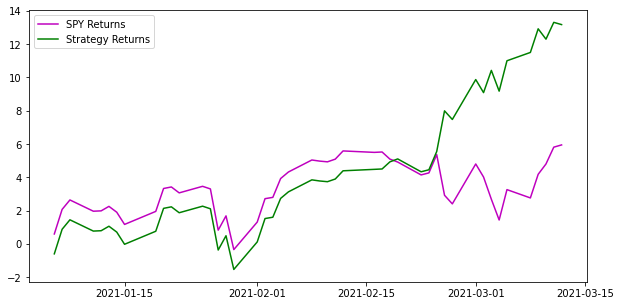

In [12]:
# Plot the results to visualize the performance
plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='m',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [13]:
# Calculate Sharpe reatio
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = abs(Sharpe.mean())
print('Sharpe ratio: %.2f'%Sharpe)

Sharpe ratio: 0.26
